In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

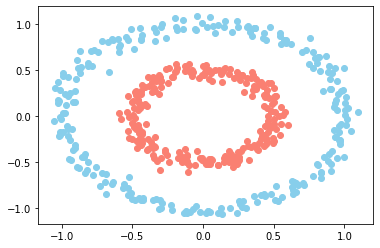

In [34]:
n = 500 
p = 2 

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

Y = Y[:,np.newaxis]
plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1], c='skyblue')
plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1], c='salmon')
plt.show()

In [31]:
print(X.shape)
print(Y.shape)

(500, 2)
(500,)


Esta clase es para poder crear capas facilmente.

In [9]:
class neural_layer():
    #Parametros: numero de conexiones y numero de nueronas. Tambien la funcion de activacion. 
    def __init__(self, n_conn, n_neur, act_f):
        # Esta es la funcion de activacion.
        self.act_f = act_f
        # Este seria el bias. Esto se hace para tener un numero entre -1 y 1.
        self.b = np.random.rand(1,n_neur) * 2 - 1  
        # Este es el peso de cada neurona para la suma ponderada. Esto se hace para tener un numero entre -1 y 1.
        self.W = np.random.rand(n_conn,n_neur) * 2 - 1 

Funciones de activacion

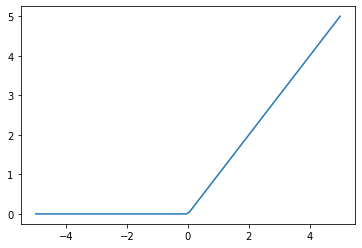

In [14]:
sigm = (lambda x: 1/ ( 1 + np.e **(-x)),
        lambda x: x * (1 - x))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, relu(_x))

In [19]:
# Podemos crear las capas una a una
l0 = neural_layer(p, 4, sigm) # La capa 0
l1 = neural_layer(4, 8, sigm)

def create_nn(topology, act_f): # en este caso por simplicidad se decide tener solo una capa de activacion.
    nn = [] # Vector para guardar todas las capas, la estructura de datos de nuestra red.
    
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l], topology[l+1], act_f))
    
    return nn

Entrenar la red neuronal

In [38]:
topology = [p, 4, 8, 16, 8, 4, 1] # Vector para decidir cuantas neuronas vamos a tener en cada capa
neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp-Yr)**2),
           lambda Yp, Yr: (Yp - Yr)) # Error cuadratico medio



def train(neural_net, X, Y, l2_cost, lr=0.5, train = True):
    out = [(None, X)] #Guardar pares de informacon suma ponderada del layer y activacion
    #Forward pass
    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b # Suma ponderada
        a = neural_net[l].act_f[0](z)
        
        out.append((z, a))
    print(l2_cost[0](out[-1][1], Y))

    if train:
        #Backward pass
        deltas = []
        
        for l in reversed(range (0, len(neural_net))):
            z = out[l+1][0] #Todas las salidas en cada capa
            a = out[l+1][1] #Todas las salidas en cada capa
            if l == len(neural_net) - 1:
                #Calcular delta ultima capa
                deltas.insert(0, l2_cost[1](a,Y) * neural_net[l].act_f[1](a)) # las segunda parte es delta 0
                print (deltas)
            else:
                #Calcular delta respecto a capa previa
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a)) # las segunda parte es delta 0
            
            _W = neural_net[l].W 
            
            #Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
            
    return out[-1][1]
        
        
train(neural_net, X, Y, l2_cost, 0.5)
print("\n")

0.33610817141559973
[array([[-0.03386077],
       [ 0.1300085 ],
       [ 0.13017546],
       [ 0.12992177],
       [-0.03379087],
       [-0.03379395],
       [-0.03387165],
       [-0.03379023],
       [ 0.1301168 ],
       [-0.03382566],
       [-0.0337741 ],
       [ 0.12993892],
       [-0.03377286],
       [-0.03383814],
       [-0.03380268],
       [-0.0337739 ],
       [-0.03390505],
       [ 0.12995643],
       [-0.03390786],
       [-0.03378581],
       [ 0.12990873],
       [ 0.12992034],
       [ 0.13017596],
       [-0.03391388],
       [-0.03390842],
       [-0.03389983],
       [ 0.12989862],
       [ 0.13016407],
       [ 0.13018456],
       [ 0.12990784],
       [-0.03376983],
       [ 0.13012922],
       [ 0.12993953],
       [ 0.1301449 ],
       [-0.03387584],
       [-0.03390859],
       [ 0.13006554],
       [ 0.13018379],
       [-0.03388261],
       [-0.03378522],
       [ 0.12996074],
       [-0.03389994],
       [-0.03379776],
       [-0.03378108],
       [-0.